DCT Coefficients: [ 85.732141   -41.62561796   0.          -4.0824829    0.
  -0.80078891]
Thresholded DCT Coefficients: [ 85.732141   -41.62561796   0.           0.           0.
   0.        ]
Reconstructed Signal: [11.78632795 18.00641263 28.77991532 41.22008468 51.99358737 58.21367205]


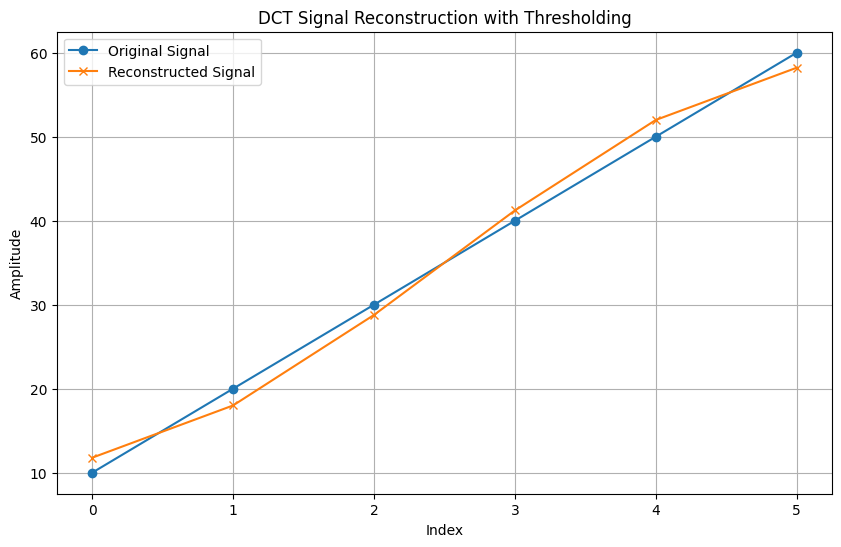

In [1]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt

# Original signal
signal = np.array([10, 20, 30, 40, 50, 60])

# Apply DCT
dct_coeffs = dct(signal, norm='ortho')
print("DCT Coefficients:", dct_coeffs)

# Thresholding
threshold = 15
dct_coeffs_thresholded = np.where(np.abs(dct_coeffs) < threshold, 0, dct_coeffs)
print("Thresholded DCT Coefficients:", dct_coeffs_thresholded)

# Reconstruct the signal using IDCT
reconstructed_signal = idct(dct_coeffs_thresholded, norm='ortho')
print("Reconstructed Signal:", reconstructed_signal)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Original Signal', marker='o')
plt.plot(reconstructed_signal, label='Reconstructed Signal', marker='x')
plt.title('DCT Signal Reconstruction with Thresholding')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


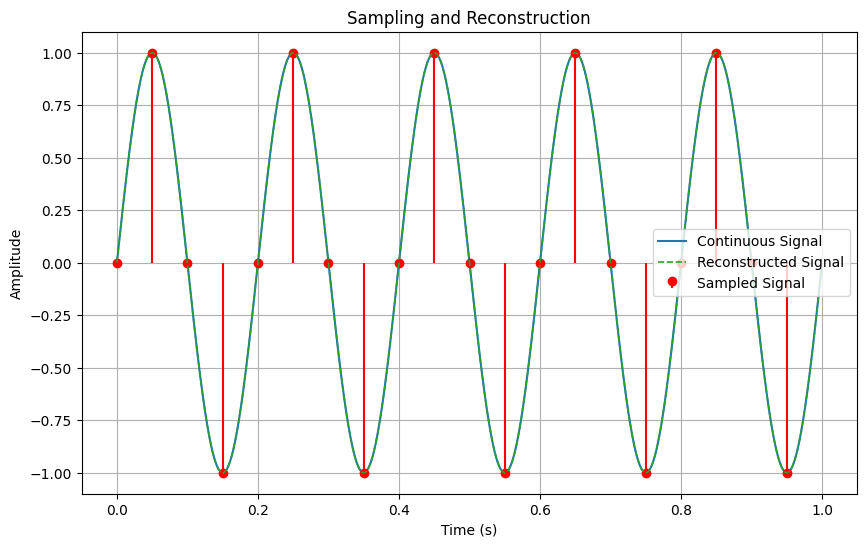

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Original continuous-time signal
fs_continuous = 1000  # Continuous sampling rate (for visualization)
t_continuous = np.linspace(0, 1, fs_continuous, endpoint=False)
signal_continuous = np.sin(2 * np.pi * 5 * t_continuous)  # 5 Hz sine wave

# Sampling
fs_sampled = 20  # Sampled at 20 Hz
t_sampled = np.linspace(0, 1, fs_sampled, endpoint=False)
signal_sampled = np.sin(2 * np.pi * 5 * t_sampled)

# Reconstruction
fs_reconstructed = 1000  # Reconstructed to 1000 Hz
t_reconstructed = np.linspace(0, 1, fs_reconstructed, endpoint=False)
signal_reconstructed = resample(signal_sampled, len(t_reconstructed))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, signal_continuous, label="Continuous Signal", lw=1.5)
plt.stem(t_sampled, signal_sampled, linefmt='r-', markerfmt='ro', basefmt=" ", label="Sampled Signal")
plt.plot(t_reconstructed, signal_reconstructed, label="Reconstructed Signal", lw=1.2, linestyle='--')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sampling and Reconstruction")
plt.grid(True)
plt.show()
